In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

## Review of Z distribution, CDF and SF

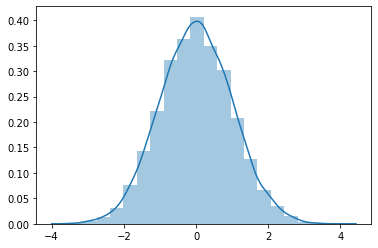

In [7]:
mean = 60
sigma = 10
X = np.random.normal(mean, sigma, 10000)
Z = (X - mean)/sigma

sns.distplot(Z, hist=True, kde=True, bins=20)

## Null hypothesis drug example on rat

In [11]:
from scipy.stats import norm

# pop mean for A
mu = 1.2
# standard deviation (std) for Scenario A
sigma = 0.5
# statistical significance
alpha = 0.05
# sample mean for B
xbar = 1.05
# number of samples for B
N = 100
# sample STD of B (unknown)
# S = ?

def accept_or_reject_null_hypothesis(mu, sample_mean, significant_level, N, sigma):
    # Calculate standard deviation of the sampling distribution
    sample_std = sigma / np.sqrt(N)
    
    # Calculate z-score from population mean (mu), sample mean and sample std
    z = (sample_mean - mu) / sample_std
    
    # Calculate p-value from z-score
    p_value = 2 * norm.cdf(-np.abs(z))
    
    # Determine whether to accept or reject null hypothesis
    if p_value < significant_level:
        print('reject null hypothesis')
    else:
        print('accept null hypothesis')
        
accept_or_reject_null_hypothesis(mu, xbar, alpha, N, sigma)

reject null hypothesis


## T-test Activity

> because sigma is unknown, alternative method should be used

In [12]:
from scipy import stats

x = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]
mu = 175.3
sample_mean = np.array(x).mean()

# Calculate the standard deviation of sample distribution

N = len(x) # number of data samples
S = np.array(x).std(ddof=1)
den = S /np.sqrt(N)

# t-test from formula
t = (sample_mean - mu)/den
print("t-statistic: ",t)

# one sample t-test that gives you the p-value too can be done with scipy as follows:
t, p = stats.ttest_1samp(x, mu)
print("t = ", t, ", p = ", p)

t-statistic:  2.295568968083183
t =  2.295568968083183 , p =  0.04734137339747034


In [17]:
import scipy

# pop mean for A
mu = 1.2
# standard deviation (std) for Scenario A
sigma = 0.5
# statistical significance
alpha = 0.05
# sample mean for B
xbar = 1.05
# number of samples for B
N = 100
# sample STD of B (unknown)
# S = ?

def z_t_null_hypothesis(data_sample, mu, sigma, significant_level):
    # If sigma is known, calculate using the z-test
    if sigma:
        z_score = (np.mean(data_sample)-mu)/(sigma/np.sqrt(data_sample)) # remove len()
        p = scipy.stats.norm.sf(abs(z_score))*2
    # If the data_sample is greater than 30, calculate using the z-test
    elif len(data_sample) > 30:
        z_score = (np.mean(data_sample)-mu)/(np.std(data_sample)/np.sqrt(data_sample))  # remove len()
        p = scipy.stats.norm.sf(abs(z_score))*2
    # otherwise, calculate using the t-test
    else:
        t, p = stats.ttest_1samp(data_sample, mu)

    if p < significant_level:
        print('reject null hypothesis')
        
    else:
        print('accept null hypothesis')
        
# TODO: add
z_t_null_hypothesis(N, mu, sigma, alpha)

reject null hypothesis
